In [2]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from bs4 import BeautifulSoup


In [3]:
df = pd.read_csv('../raw_data/fraud_email.csv')
df.head()

,Text,Class
0,Supply Quality China's EXCLUSIVE dimensions at...,1
1,over. SidLet me know. Thx.,0
2,"Dear Friend,Greetings to you.I wish to accost ...",1
3,MR. CHEUNG PUIHANG SENG BANK LTD.DES VOEUX RD....,1
4,Not a surprising assessment from Embassy.,0


In [4]:
df.shape

(11929, 2)

In [5]:
df['Class'].value_counts()

0    6742
1    5187
Name: Class, dtype: int64

In [6]:
df.dropna(inplace=True)
df.isnull().sum()

Text     0
Class    0
dtype: int64

In [7]:
!pip install nltp
!unzip /usr/share/nltk_data/corpora/wordnet.zip -d /usr/share/nltk_data/corpora/
from nltp import Preprocessor

unzip:  cannot find or open /usr/share/nltk_data/corpora/wordnet.zip, /usr/share/nltk_data/corpora/wordnet.zip.zip or /usr/share/nltk_data/corpora/wordnet.zip.ZIP.


In [8]:
df['Text'] = df['Text'].apply(lambda s: BeautifulSoup(s).text)
df.head()

,Text,Class
0,Supply Quality China's EXCLUSIVE dimensions at...,1
1,over. SidLet me know. Thx.,0
2,"Dear Friend,Greetings to you.I wish to accost ...",1
3,MR. CHEUNG PUIHANG SENG BANK LTD.DES VOEUX RD....,1
4,Not a surprising assessment from Embassy.,0


In [9]:
pre = Preprocessor(df['Text']).text_cleaner()

Cleaning Complete
Time Taken: 7.379 seconds


In [9]:
pre[1]

'sidlet know thx'

In [10]:
pre[2]

'dear friend greeting wish accost request would immense benefit u executor will possible may tempted make fortune client situation cannot help left better option issue presenting case client willed fortune next kin unfortunate next kin died day st october egyptian airline passenger board confirm website published bbc world news website http ew bbc co uk hi world america stm faced confusion pas fortune according english law fortune supposed bequeathed government nobody come forward next kin within seven year demise benefactor purpose contacting seek acting beneficiary lay claim legacy million deceased client bequeathed next kin alone know client great confidence everything left share would would want give huge part share tsunami victim primary objective amend add codicil make beneficiary million legacy feel may apprehensive consider amount big defend matter document back legacy passed next kin sure getting consent issue prefer divulge full identity risk disbarred english bar considers b

In [11]:
X = pre
y = df['Class']

In [12]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.linear_model import LogisticRegression

from sklearn.svm import LinearSVC
from sklearn.naive_bayes import BernoulliNB

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=42)

print(f'X_Train: {len(X_train)}\nX_Test: {len(X_test)}\ny_Train: {len(y_train)}\ny_Test: {len(y_test)}')

X_Train: 9542
X_Test: 2386
y_Train: 9542
y_Test: 2386


In [14]:
def fit_predict(model):   

    clf = Pipeline([('tfidf',TfidfVectorizer()),
                   ('clf',model)])

    clf.fit(X_train, y_train)
   
    Score = clf.score(X_test,y_test)
    print(f'score: {Score*100}') 
    
    return clf

In [15]:
class Metrics():
    
    def __init__(self, pred):
        self.pred = pred
        
    def cm(self):
        cm = confusion_matrix(y_test, self.pred)
        labels = ['Not Spam','Spam']

        f, ax = plt.subplots(figsize=(5,5))
        sns.heatmap(cm,annot =True, linewidth=.6, linecolor="r", fmt=".0f", ax = ax)

        ax.set_xticklabels(labels)
        ax.set_yticklabels(labels)
        plt.show()

    def report(self):
        class_report = classification_report(y_test, self.pred)
        print(class_report)

In [16]:
LR_model = fit_predict(LogisticRegression())

LR_pred = LR_model.predict(X_test)

score: 98.23973176865046


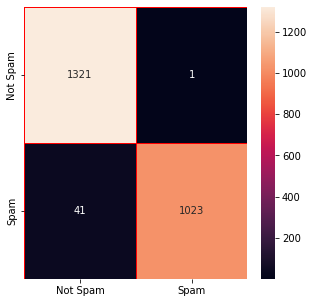

              precision    recall  f1-score   support

           0       0.97      1.00      0.98      1322
           1       1.00      0.96      0.98      1064

    accuracy                           0.98      2386
   macro avg       0.98      0.98      0.98      2386
weighted avg       0.98      0.98      0.98      2386



In [17]:
Metrics(LR_pred).cm()

Metrics(LR_pred).report()

In [18]:
from sklearn.ensemble import RandomForestClassifier


In [19]:
RF_model = fit_predict(RandomForestClassifier())
RF_pred = RF_model.predict(X_test)

score: 98.44928751047779


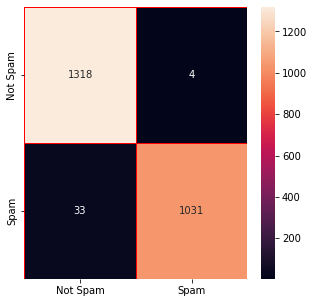

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1322
           1       1.00      0.97      0.98      1064

    accuracy                           0.98      2386
   macro avg       0.99      0.98      0.98      2386
weighted avg       0.98      0.98      0.98      2386



In [20]:
Metrics(RF_pred).cm()

Metrics(RF_pred).report()

In [21]:
X_train_new, X_vali, y_train_new, y_vali = train_test_split(X_train, y_train, test_size=0.2, shuffle=True, random_state=42)

In [1]:
pip show tensorflow

Name: tensorflow
Version: 2.13.0
Summary: TensorFlow is an open source machine learning framework for everyone.
Home-page: https://www.tensorflow.org/
Author: Google Inc.
Author-email: packages@tensorflow.org
License: Apache 2.0
Location: /Users/zhenliu15471/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages
Requires: absl-py, astunparse, flatbuffers, gast, google-pasta, grpcio, h5py, keras, libclang, numpy, opt-einsum, packaging, protobuf, setuptools, six, tensorboard, tensorflow-estimator, tensorflow-io-gcs-filesystem, termcolor, typing-extensions, wrapt
Required-by: tensorflow-text
Note: you may need to restart the kernel to use updated packages.


In [1]:
pip install --upgrade tensorflow

Note: you may need to restart the kernel to use updated packages.


In [ ]:

import tensorflow as tf

In [2]:
pip freeze

absl-py==1.4.0
aiobotocore==2.3.2
aiohttp==3.8.1
aioitertools==0.8.0
aiosignal==1.2.0
alembic==1.4.1
altair==4.2.0
anyio==3.4.0
appdirs==1.4.4
appnope==0.1.2
argon2-cffi==21.3.0
argon2-cffi-bindings==21.2.0
asgiref==3.4.1
astroid==2.7.3
astunparse==1.6.3
async-generator==1.10
async-timeout==4.0.2
attrs==21.4.0
autoflake==1.4
autopep8==1.6.0
Babel==2.9.1
backcall==0.2.0
backports.zoneinfo==0.2.1
beautifulsoup4==4.10.0
bert-tensorflow==1.0.1
black==21.7b0
bleach==4.1.0
blinker==1.4
botocore==1.24.21
branca==0.4.2
cachetools==4.2.4
category-encoders==2.3.0
certifi==2021.10.8
cffi==1.15.0
chardet==5.2.0
charset-normalizer==2.0.12
chromedriver-binary==77.0.3865.40.0
click==8.0.3
cloudpickle==2.0.0
cmdstanpy==0.9.5
colorama==0.4.4
commonmark==0.9.1
convertdate==2.3.2
coverage==6.2
cryptography==36.0.1
cycler==0.11.0
Cython==0.29.26
dask==2021.12.0
databricks-cli==0.16.2
datasets==2.10.1
deap==1.3.1
debugpy==1.5.1
decorator==5.1.0
defusedxml==0.7.1
dill==0.3.6
docker==5.0.3
docutils==0.18.1
e

In [23]:
import numpy as np
from transformers import BertTokenizer, TFBertForSequenceClassification
from transformers import InputExample, InputFeatures
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from sklearn.metrics import classification_report

from sklearn.preprocessing import LabelEncoder

In [24]:
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

In [25]:
# Encode Labels
encoder = LabelEncoder()
train_labels = encoder.fit_transform(y_train_new)
val_labels = encoder.transform(y_vali)
test_labels = encoder.transform(y_test)

In [26]:
# Tokenize the data
train_encodings = tokenizer(X_train_new, truncation=True, padding=True, max_length=256)
valid_encodings = tokenizer(X_vali, truncation=True, padding=True, max_length=256)
test_encodings = tokenizer(X_test, truncation=True, padding=True, max_length=256)

In [27]:
# Convert to TensorFlow Datasets
train_dataset = tf.data.Dataset.from_tensor_slices((
    dict(train_encodings),
    train_labels
)).shuffle(1000).batch(16)

val_dataset = tf.data.Dataset.from_tensor_slices((
    dict(valid_encodings),
    val_labels
)).batch(16)

test_dataset = tf.data.Dataset.from_tensor_slices((
    dict(test_encodings),
    test_labels
)).batch(16)

2023-08-03 17:10:15.070538: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [37]:
test_dataset_tf = tf.data.Dataset.from_tensor_slices((
    dict(test_encodings),
    test_labels
))

In [28]:
model = TFBertForSequenceClassification.from_pretrained("bert-base-uncased")

All model checkpoint layers were used when initializing TFBertForSequenceClassification.

Some layers of TFBertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [29]:
# Compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [30]:
# Train the model
model.fit(
    train_dataset,
    validation_data=val_dataset,
    epochs=1,)

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: '<' not supported between instances of 'str' and 'Literal'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: '<' not supported between instances of 'str' and 'Literal'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Instructions for updating:
The `validate_indices` argument has no effect. Indices are always validated on CPU and never validated on GPU.


2023-08-03 17:11:05.896450: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:176] None of the MLIR Optimization Passes are enabled (registered 2)


478/478 [==============================] - 5598s 12s/step - loss: 0.1046 - accuracy: 0.9684 - val_loss: 0.0412 - val_accuracy: 0.9869


In [34]:
y_pred_raw = model.predict(test_dataset)

In [35]:
# Convert raw predictions to class predictions
y_pred = np.argmax(y_pred_raw.logits, axis=1)

In [38]:
y_pred

array([0, 1, 0, ..., 0, 0, 0])

In [39]:
y_test

3958     0
8588     1
3742     0
357      0
4898     0
        ..
3921     0
10392    0
3984     0
267      0
4048     0
Name: Class, Length: 2386, dtype: int64

In [41]:


# Generate a classification report
report = classification_report(y_test, y_pred,target_names=["Not Phishing", "Phishing"])  # replace target_names with your actual class names
print(report)


              precision    recall  f1-score   support

Not Phishing       0.98      1.00      0.99      1322
    Phishing       1.00      0.97      0.99      1064

    accuracy                           0.99      2386
   macro avg       0.99      0.99      0.99      2386
weighted avg       0.99      0.99      0.99      2386

